# Project N°4: Wrangle and Analyze Data

### Cristian Tapia

## Table of Contents
<ul>
<li><a href="#gatherdata">Gather Data</a></li>
<li><a href="#assessdata">Assess Data</a></li>
<li><a href="#cleaningdata">Cleaning Data</a></li>
<li><a href="#analyze">Analyze</a></li>
<li><a href="#insights">Insights</a></li>
</ul>

<a id='gatherdata'></a>
# Gather Data

### DataFrame N°1

In [183]:
import pandas as pd
import requests
import os

# Read the file and show the first 5 rows of the dataset
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [184]:
# Make directory if it doesn't already exist
folder_name = 'twitter_project'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [185]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [186]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [187]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [188]:
os.listdir(folder_name)

['image-predictions.tsv']

In [189]:
df1 = pd.read_csv('twitter_project/image-predictions.tsv', delimiter='\t')
df1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### DataFrame N°2

In [190]:
import tweepy
import json
from timeit import default_timer as timer

consumer_key = '02maAur55THARRBC0bVyVAyQs'
consumer_secret = 'bi0j55QMVPYEA7E2rSt1zom9zjEJb1qalpJkmdbBFjAxOd0uPs'
access_token = '164539465-Ny8mzPqNj37w7F07iCAvmmEHzSCra1E7OLdExHcl'
access_secret = '7E49AhmbUNGgPn9fIl3kTo1F9LHpl90OD9CGpbWqGdyY7'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

- Dowload Twitter data from Twiter API (source: https://video.udacity-data.com/topher/2018/November/5be5fb4c_twitter-api/twitter-api.py)


In [72]:
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_new' is not defined

In [191]:
# Create a DataFrame with the gathered data

# At this point, it is going to be used the data provided from Udacity's
# server in order to avoid missing data

data = []
with open('tweet-json.txt') as json_file:
    for line in json_file:
        data.append(json.loads(line))
df2 = pd.DataFrame(data)
df2.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<a id='assessdata'></a>
# Assess Data

### Visual assessment

In [192]:
# Display the first DataFrame
df1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [193]:
# Display the second DataFrame
df2

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

### Programatic Assessment

In [194]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [195]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [196]:
df2[df2['coordinates'].isnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

### Quality issues

**Visual Assessment**

- `df1` table: Some columns are not properly understood by their names
- `df1` table: There are some values that do not belong to dog's breeds
- `df2` table: Some columuns are invalid or unneeded for analysis
- `df2` table: Missing values in multiple columns (None and NaN)
 
**Programatic Assessment**

- `df2` table: `source` column shows webpages as HTML code
- `df2` table: `lang` column should be a categorical data type
- `df2` table: `created_at` column should be a datetime data type
- `df2` table: `id` and `id_str` columns are duplicated

### Tidiness issues

**Visual Assesment**

- `df2` table: Multiple variables stored in the column `user` column
- `df2` table: Variables are stored in both rows and columns (`extended_entities` column).

<a id='cleaningdata'></a>
# Cleaninig Data

### Define

- `df1` table: Change the name of every column that cannot be properly understand
- `df1` table: Correct values that are not dog's breeds
- `df2` table: Delete invalid, unneeded and missing data columns
- `df2` table: Change the data type to `lang` and `created_at` columns
- `df2` table: Drop the duplicated `id_str` column

### Code

In [197]:
# Rename columns for better undestanding
df1.rename(columns={'p1': 'st_img_predict', 'p1_conf': 'st_img_predict_conf', 
                    'p1_dog': 'st_img_predict_isdog', 'p2': 'nd_img_predict', 
                    'p2_conf': 'nd_img_predict_conf', 'p2_dog': 'nd_img_predict_isdog',
                    'p3': 'rd_img_predict', 'p3_conf': 'rd_img_predict_conf', 
                    'p3_dog': 'rd_img_predict_isdog'
                        }, inplace=True)

In [198]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [199]:
df2.drop(['contributors', 'display_text_range', 'coordinates',
          'extended_entities', 'geo', 'in_reply_to_screen_name',
          'in_reply_to_status_id', 'in_reply_to_status_id_str',
          'in_reply_to_user_id', 'in_reply_to_user_id_str', 'place',
          'possibly_sensitive', 'possibly_sensitive_appealable',
          'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
          'retweeted_status', 'display_text_range', 'entities',
          'full_text', 'id_str', 'is_quote_status', 'source',
          'truncated', 'user'], axis=1, inplace=True)

df1.drop(['jpg_url', 'img_num'], axis=1, inplace=True)

In [200]:
# Convert 'created_at' column to datetime format and 'lang' column to categorical format
df2['created_at']= pd.to_datetime(df2['created_at'])
df2['lang'].astype('category')

0       en
1       en
2       en
3       en
4       en
5       en
6       en
7       en
8       en
9       en
10      en
11      en
12      en
13      en
14      en
15      en
16      en
17      en
18      en
19      en
20      en
21      en
22      en
23      en
24      en
25      en
26      en
27      en
28      en
29      en
        ..
2324    en
2325    en
2326    en
2327    en
2328    en
2329    en
2330    en
2331    en
2332    en
2333    en
2334    en
2335    en
2336    en
2337    en
2338    en
2339    en
2340    en
2341    en
2342    en
2343    en
2344    en
2345    en
2346    en
2347    en
2348    en
2349    en
2350    en
2351    en
2352    en
2353    en
Name: lang, Length: 2354, dtype: category
Categories (9, object): [en, es, et, eu, ..., nl, ro, tl, und]

### Test

In [201]:
df1.head()

,tweet_id,st_img_predict,st_img_predict_conf,st_img_predict_isdog,nd_img_predict,nd_img_predict_conf,nd_img_predict_isdog,rd_img_predict,rd_img_predict_conf,rd_img_predict_isdog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [202]:
df1[mask].st_img_predict.value_counts().sort_index()

acorn_squash                2
agama                       1
alp                         1
axolotl                     2
badger                      2
bakery                      1
bald_eagle                  1
balloon                     3
banana                      1
bannister                   1
barbell                     1
barrow                      4
basenji                     7
basketball                  1
basset                     13
bath_towel                  7
bathtub                     4
beach_wagon                 1
beagle                     18
bearskin                    1
beaver                      1
bee_eater                   1
bib                         1
bighorn                     1
binoculars                  1
birdhouse                   2
bison                       1
black-and-tan_coonhound     2
black-footed_ferret         1
bloodhound                  7
                           ..
toy_poodle                 39
toy_terrier                 2
toyshop   

In [203]:
df1[df1['st_img_predict'].str.contains('^[a-z]', regex = True)==False]
df1[df1['nd_img_predict'].str.contains('^[a-z]', regex = True)==False]
df1[df1['rd_img_predict'].str.contains('^[a-z]', regex = True)==False]

,tweet_id,st_img_predict,st_img_predict_conf,st_img_predict_isdog,nd_img_predict,nd_img_predict_conf,nd_img_predict_isdog,rd_img_predict,rd_img_predict_conf,rd_img_predict_isdog
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
10,666063827256086533,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
12,666073100786774016,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
13,666082916733198337,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
15,666099513787052032,Lhasa,0.582330,True,Shih-Tzu,0.166192,True,Dandie_Dinmont,0.089688,True
23,666345417576210432,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,0.014241,True


In [204]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
created_at        2354 non-null datetime64[ns]
favorite_count    2354 non-null int64
favorited         2354 non-null bool
id                2354 non-null int64
lang              2354 non-null object
retweet_count     2354 non-null int64
retweeted         2354 non-null bool
dtypes: bool(2), datetime64[ns](1), int64(3), object(1)
memory usage: 96.6+ KB


In [210]:
# Merge DataFrames
df_master = df1.merge(df2, left_on='tweet_id', right_on='id')
df_master.head()

# Save the merged DataFrame
df_master.to_csv('twitter_archive_master.csv', index=False)


<a id='analyze'></a>
# Analyze

In [211]:
import matplotlib.pyplot as plt
% matplotlib inline

# Analyze the dataset with statistics 
df_master.describe()

,tweet_id,st_img_predict_conf,nd_img_predict_conf,rd_img_predict_conf,favorite_count,id,retweet_count
count,2.073000e+03,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2.073000e+03,2073.000000
mean,7.383634e+17,0.594532,1.346665e-01,6.034005e-02,8556.718283,7.383634e+17,2976.089243
std,6.780118e+16,0.271234,1.006830e-01,5.092769e-02,12098.640994,6.780118e+16,5054.897526
min,6.660209e+17,0.044333,1.011300e-08,1.740170e-10,0.000000,6.660209e+17,16.000000
25%,6.764706e+17,0.364095,5.390140e-02,1.619920e-02,1674.000000,6.764706e+17,634.000000
50%,7.119681e+17,0.588230,1.186220e-01,4.947150e-02,3864.000000,7.119681e+17,1408.000000
75%,7.931959e+17,0.843911,1.955730e-01,9.193000e-02,10937.000000,7.931959e+17,3443.000000
max,8.924206e+17,1.000000,4.880140e-01,2.734190e-01,132810.000000,8.924206e+17,79515.000000


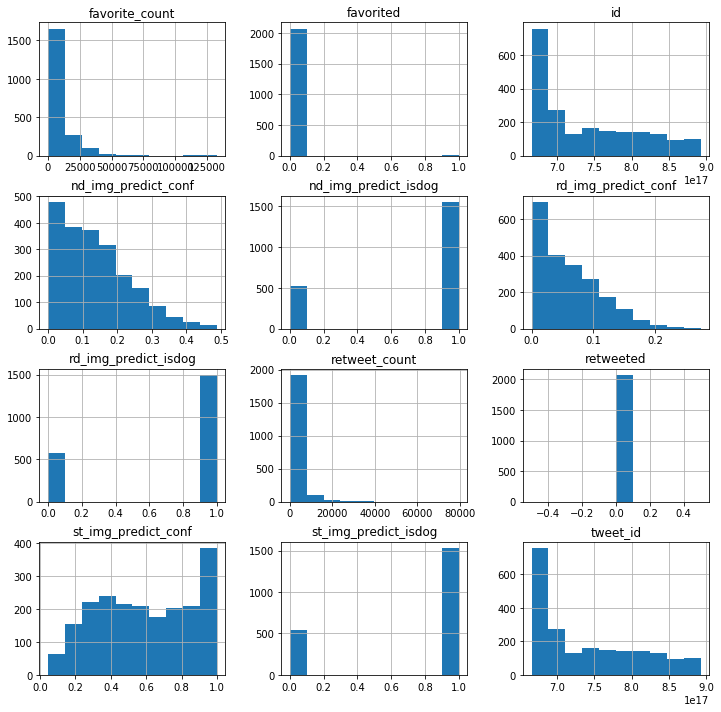

In [212]:
# Show histograms of the dataset
df_master.hist(figsize=(12,12));

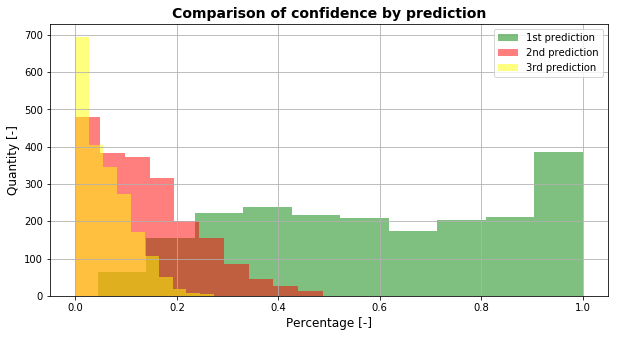

In [213]:
# Plotting histograms to analyze the chosen data
df_master['st_img_predict_conf'].hist(alpha=0.5, label='1st prediction', color='green', figsize=(10,5))
df_master['nd_img_predict_conf'].hist(alpha=0.5, label='2nd prediction', color='red', figsize=(10,5))
df_master['rd_img_predict_conf'].hist(alpha=0.5, label='3rd prediction', color='yellow', figsize=(10,5))

plt.legend()
plt.title('Comparison of confidence by prediction', fontsize=14, fontweight=600)
plt.xlabel('Percentage [-]', fontsize=12)
plt.ylabel('Quantity [-]', fontsize=12);

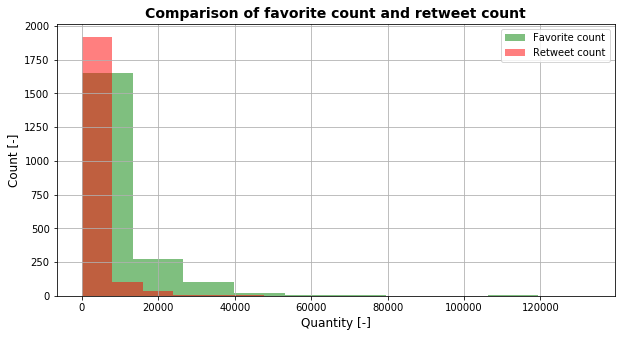

In [214]:
# Plotting histograms to analyze the chosen data
df_master['favorite_count'].hist(alpha=0.5, label='Favorite count', color='green', figsize=(10,5))
df_master['retweet_count'].hist(alpha=0.5, label='Retweet count', color='red', figsize=(10,5))

plt.legend()
plt.title('Comparison of favorite count and retweet count', fontsize=14, fontweight=600)
plt.xlabel('Quantity [-]', fontsize=12)
plt.ylabel('Count [-]', fontsize=12);

<a id='insights'></a>
## Insights

- The first graph clearly shows that the first prediction is the most accurate of the three, since its confidence range is quite even in high percentages. In fact, a large quantity number covers 100% accuracy, while the other two fluctuate between 0 and 40%, without reaching even half of the percentage of accuracy.


- From the second graph it is understood that a greater number of Twitter users preferred to bookmark the post rather than retweet it. The difference is quite significant, since for the same sample, there is a clear preference for users to choose to mark the post as favourite.


- From the histogram 'tweet_id' it can be considered that all the publications had reactions, however, one of them was the one that obtained the greatest reaction from users.